In [1]:
import pandas as pd
import numpy as np
import pyarrow.dataset as pads
import pyarrow.csv as pacsv
from SMT_Data_Starter_2025 import readDataSubset
import matplotlib.pyplot as plt
from IPython.display import HTML
import great_tables as gt
from Animation import plot_animation

In [2]:
# Just get the subsets out of the way
game_info_subset = readDataSubset('game_info')
game_events_subset = readDataSubset('game_events')
player_position_subset = readDataSubset('player_pos')
ball_position_subset = readDataSubset('ball_pos')

In [3]:
player_position_df = player_position_subset.to_table().to_pandas()
ball_position_df = ball_position_subset.to_table().to_pandas()

In [4]:
temp = game_events_subset.to_table(
    filter=pads.field('game_str') == "y1_d054_APZ_QEA").to_pandas()
temp[temp['play_id']==6]

,game_str,play_id,at_bat,play_per_game,timestamp,player_position,event_code,home_team,away_team,year,day
15,y1_d054_APZ_QEA,6,1,6,136779,1,1,QEA,APZ,year_1,day_054
16,y1_d054_APZ_QEA,6,1,6,137179,10,4,QEA,APZ,year_1,day_054
17,y1_d054_APZ_QEA,6,1,6,138029,255,16,QEA,APZ,year_1,day_054
18,y1_d054_APZ_QEA,6,1,6,138679,5,2,QEA,APZ,year_1,day_054
19,y1_d054_APZ_QEA,6,1,6,140229,5,3,QEA,APZ,year_1,day_054
20,y1_d054_APZ_QEA,6,1,6,141279,255,16,QEA,APZ,year_1,day_054
21,y1_d054_APZ_QEA,6,1,6,146529,4,2,QEA,APZ,year_1,day_054
22,y1_d054_APZ_QEA,6,1,6,147729,0,5,QEA,APZ,year_1,day_054


In [ ]:
game_events = game_events_subset.to_table().to_pandas()

AttributeError: 'DataFrame' object has no attribute 'unique'

In [9]:
game_events.groupby('game_str').game_str.count()

game_str
y1_d001_CGA_QEA    1261
y1_d002_CGA_QEA     819
y1_d003_CGA_QEA    1075
y1_d004_CGA_QEA     887
y1_d005_JJS_YJD     900
                   ... 
y2_d095_QZE_RZQ    1247
y2_d096_QZE_RZQ     934
y2_d097_YJD_RZQ     912
y2_d098_YJD_RZQ    1086
y2_d099_YJD_RZQ    1065
Name: game_str, Length: 274, dtype: int64

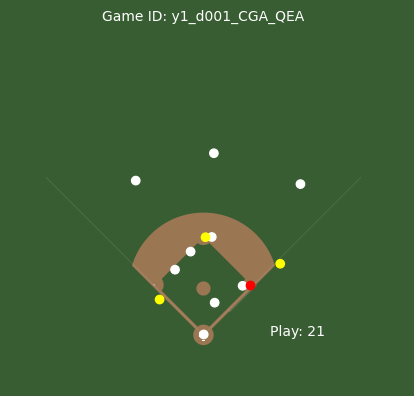

In [5]:
"""
Quick Visualization
"""
game_str = "y1_d001_CGA_QEA"
play_id = 21
player = player_position_df[player_position_df['game_str'] == game_str]
ball = ball_position_df[ball_position_df['game_str'] == game_str]
plot_animation(player, ball, play_id, save_gif=False)